In [10]:
# Image and training parameters
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
BATCH_SIZE = 32
EPOCHS = 50
DATA_SOURCE_TRAIN = 'data/malhari/train'
DATA_SOURCE_TEST = 'data/malhari/test'


In [11]:
import matplotlib.pyplot as plt

def show_model_performance(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training')
    plt.plot(val_acc, label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training')
    plt.plot(val_loss, label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [12]:
import tensorflow as tf
# Create training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_SOURCE_TRAIN,
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Create validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_SOURCE_TEST,
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names

Found 2630 files belonging to 3 classes.
Found 297 files belonging to 3 classes.


In [13]:
# Enable prefetching
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
from tensorflow.keras import layers, regularizers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2),
    layers.RandomContrast(0.2),
    layers.GaussianNoise(0.1)
])

In [15]:
from tensorflow.keras.models import Sequential

num_classes = len(class_names)

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),

    # First conv block
    layers.Conv2D(32, 3, padding='same', activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # Second conv block
    layers.Conv2D(64, 3, padding='same', activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # Third conv block
    layers.Conv2D(128, 3, padding='same', activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu',
                kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu',
                kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [16]:
# Compile model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

callbacks = [
    ModelCheckpoint(
        'checkpoints/malhari_cnn_best_model.keras',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

In [18]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4304 - loss: 21.4814
Epoch 1: val_loss improved from inf to 16.57854, saving model to checkpoints/malhari_cnn_best_model.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.4308 - loss: 21.4634 - val_accuracy: 0.3300 - val_loss: 16.5785 - learning_rate: 0.0010
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4566 - loss: 11.6442
Epoch 2: val_loss improved from 16.57854 to 10.45131, saving model to checkpoints/malhari_cnn_best_model.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 0.4567 - loss: 11.6287 - val_accuracy: 0.3300 - val_loss: 10.4513 - learning_rate: 0.0010
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4680 - loss: 8.5263
Epoch 3: val_loss improved from 10.45131 to 7.18638, saving model to checkpoints/malhari_cnn_best_model.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.4681 - loss: 8.5209 - val_accuracy: 0.3300 - val_loss: 7.1864 - learning_rate: 0.001

In [22]:
model.save('models/malhari_cnn.keras')
print(history.history)

{'accuracy': [0.45931559801101685, 0.4661597013473511, 0.4695817530155182, 0.4878326952457428, 0.5049429535865784, 0.5551331043243408, 0.5680608153343201, 0.5505703687667847, 0.6072243452072144, 0.631939172744751, 0.6133080124855042, 0.6456273794174194, 0.6547528505325317, 0.6418250799179077, 0.6513307690620422, 0.6714828610420227, 0.6235741376876831, 0.6475285291671753, 0.67452472448349, 0.6969581842422485, 0.6939163208007812, 0.7558935284614563, 0.7901140451431274, 0.8095057010650635, 0.8171102404594421, 0.8250950574874878, 0.829657793045044, 0.8406844139099121, 0.8460075855255127, 0.8927756547927856, 0.9144486784934998, 0.9269961714744568, 0.9418250918388367, 0.9429658055305481, 0.9441064596176147, 0.9513307809829712, 0.9520912766456604, 0.9528517127037048, 0.9585551619529724, 0.9562737345695496, 0.9551330804824829, 0.9551330804824829, 0.9577946662902832, 0.9596958160400391, 0.9589353799819946, 0.9615969657897949, 0.9627376198768616, 0.9661597013473511, 0.974524736404419, 0.97794675

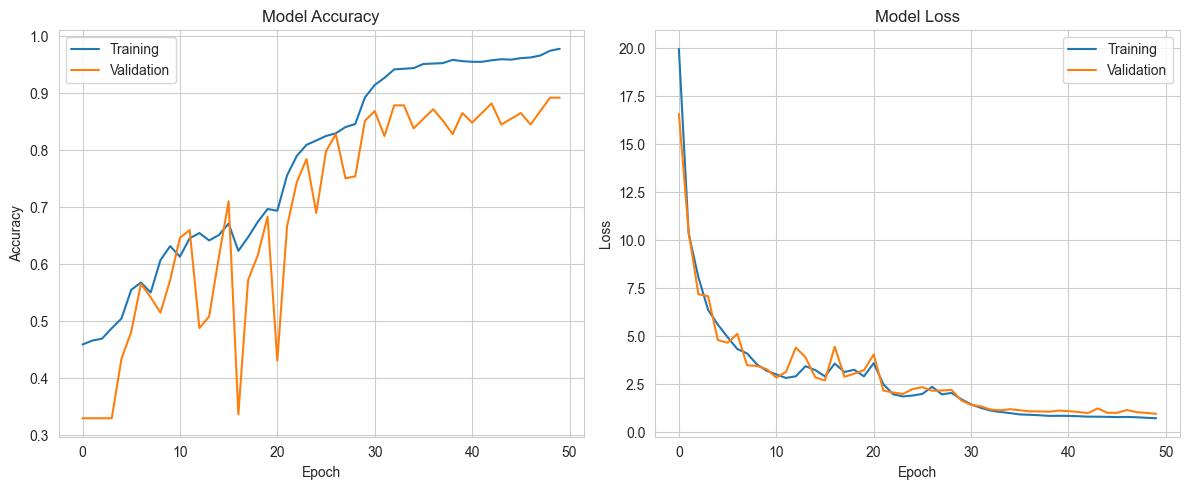

In [21]:
show_model_performance(history.history)